In [52]:
# libraries import
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [53]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("harrywang/wine-dataset-for-clustering")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/harrywang/wine-dataset-for-clustering/versions/1


In [55]:
# Define the path
dataset_path = "/root/.cache/kagglehub/datasets/harrywang/wine-dataset-for-clustering/versions/1"

# List files in the directory
files = os.listdir(dataset_path)
print("Files in the dataset directory:", files)

Files in the dataset directory: ['wine-clustering.csv']


In [56]:
csv_file = os.path.join(dataset_path, 'wine-clustering.csv')

# Read the dataset into a DataFrame
df = pd.read_csv(csv_file)
print("Dataset loaded successfully!")
print(df.head())

Dataset loaded successfully!
   Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050  
2  

# EDA

In [57]:
df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [11]:
df.isna().sum()

,0
Alcohol,0
Malic_Acid,0
Ash,0
Ash_Alcanity,0
Magnesium,0
Total_Phenols,0
Flavanoids,0
Nonflavanoid_Phenols,0
Proanthocyanins,0
Color_Intensity,0


## Univariate Analysis

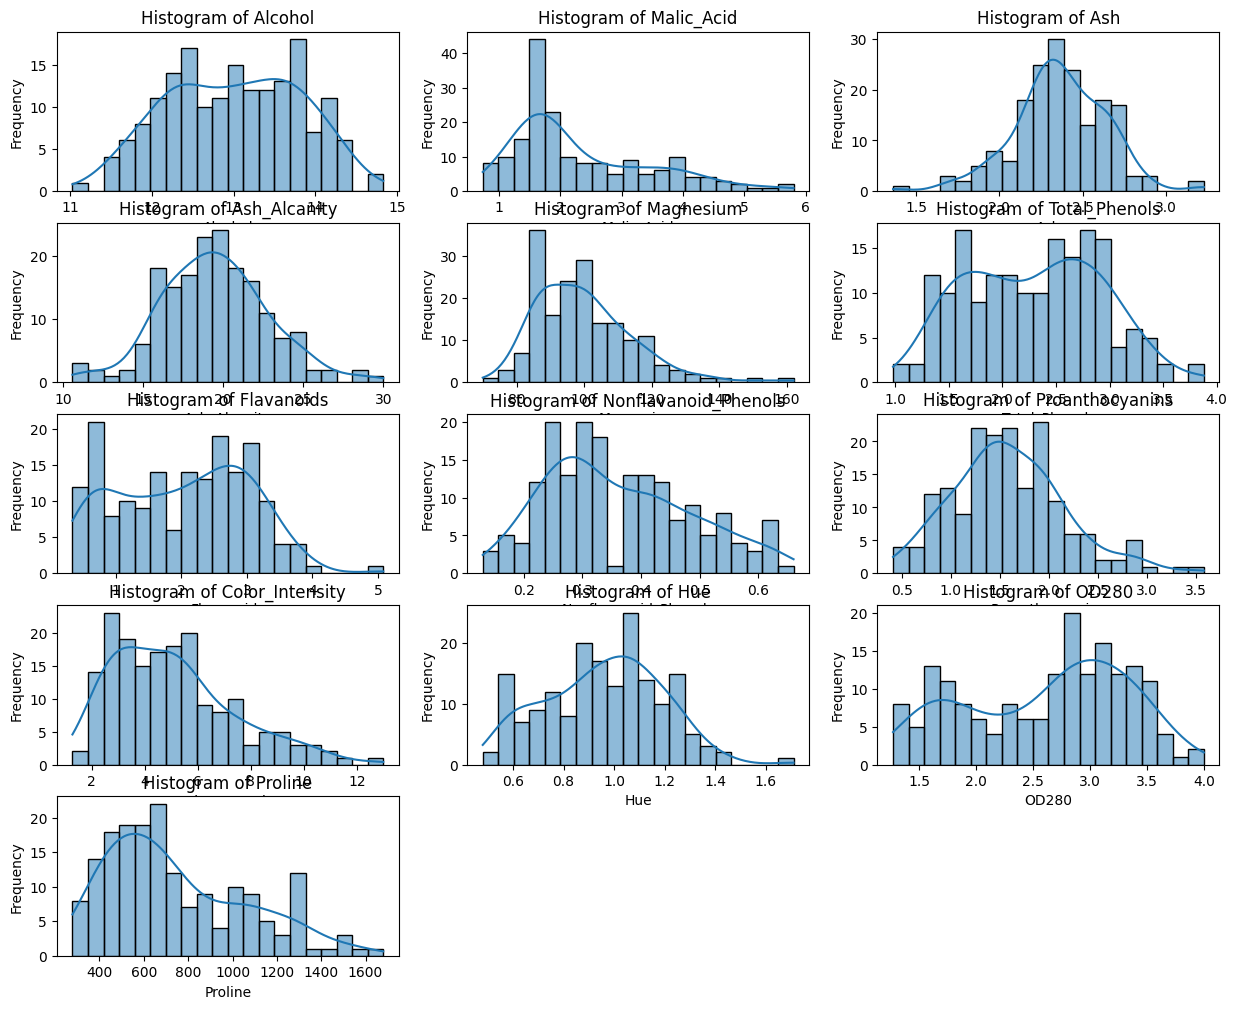

In [58]:
# Set up the figure for multiple plots
plt.figure(figsize=(15, 12))

# Define number of rows and columns for subplots
num_features = df.shape[1]
num_cols = 3
num_rows = (num_features // num_cols) + 1

# Generate histograms
for i, column in enumerate(df.columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.histplot(df[column], kde=True, bins=20)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

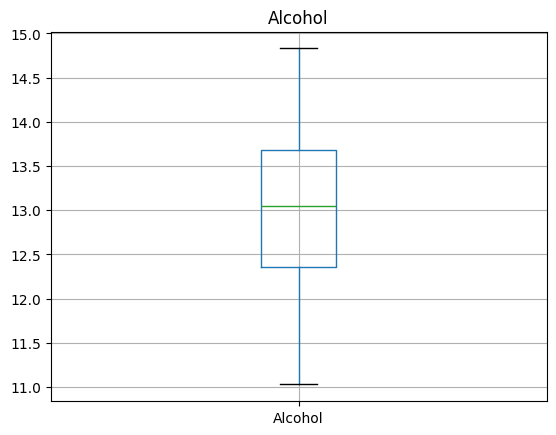

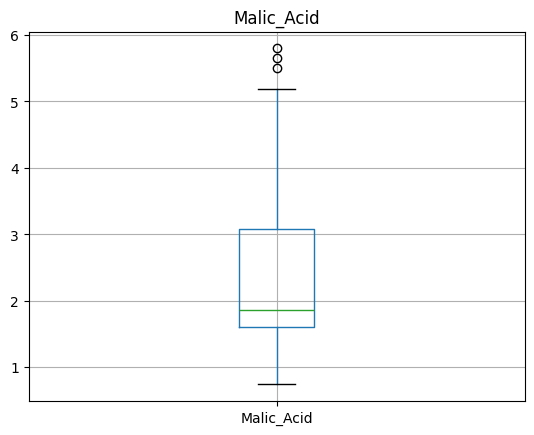

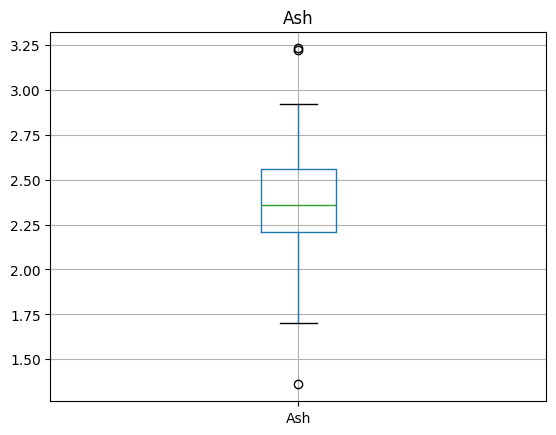

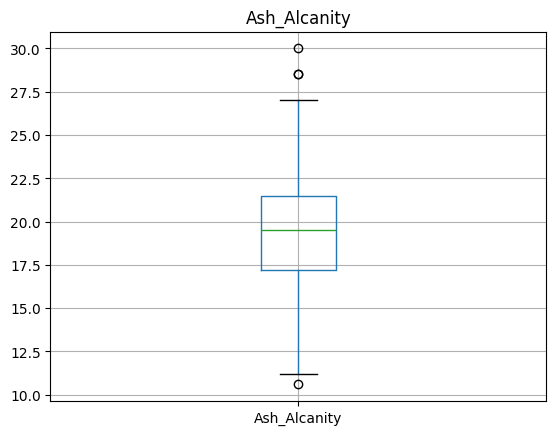

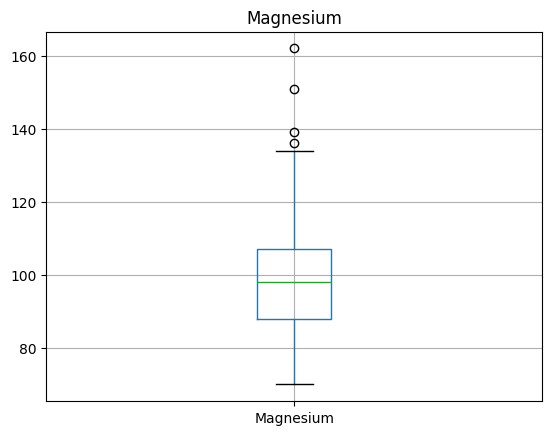

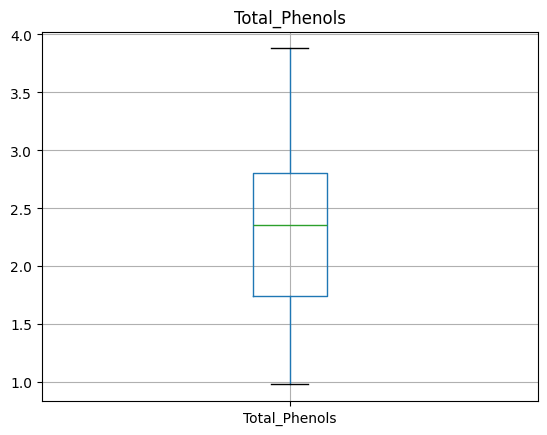

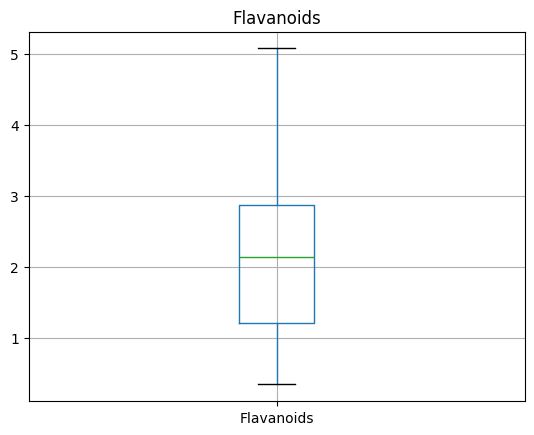

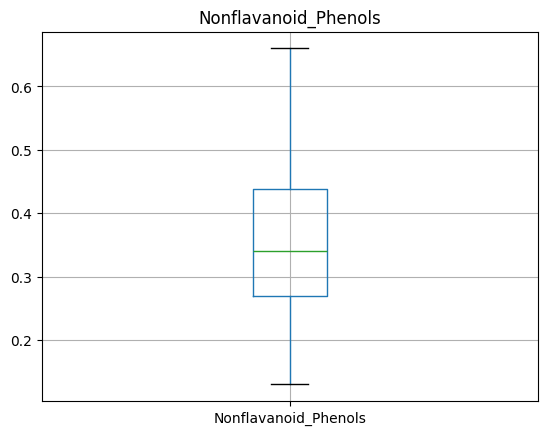

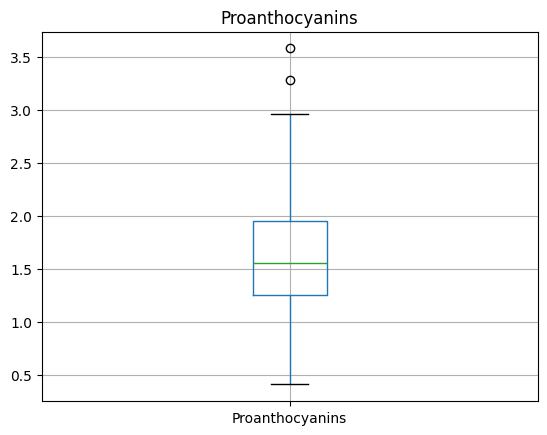

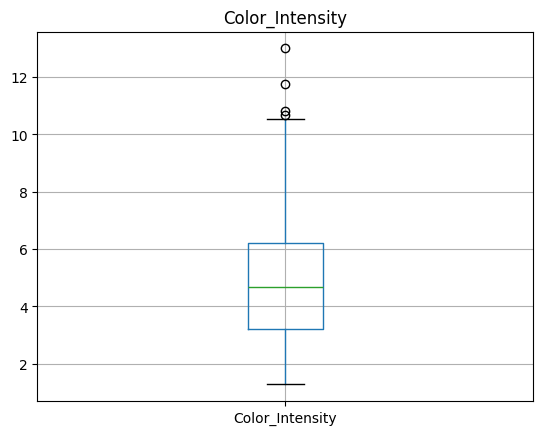

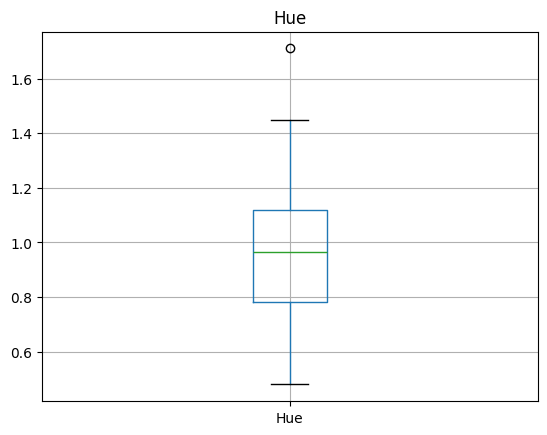

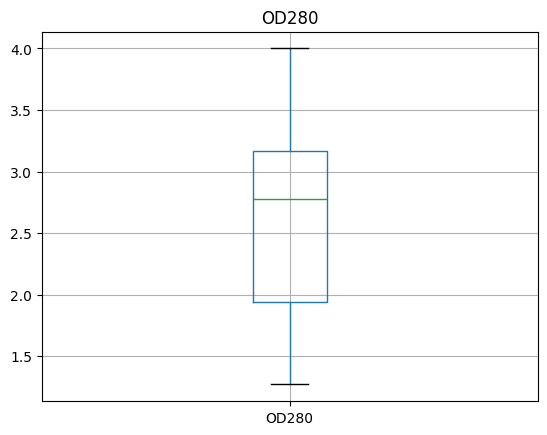

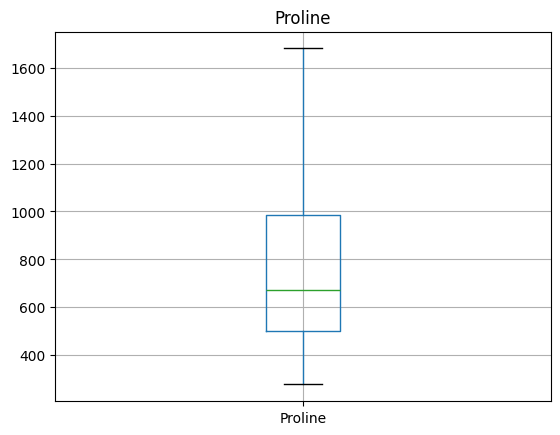

In [16]:
for col in df.columns:
    plt.figure()
    df.boxplot(column = col)
    plt.title(col)
plt.show()

## Bivariate Analysis

<Figure size 1500x1500 with 0 Axes>

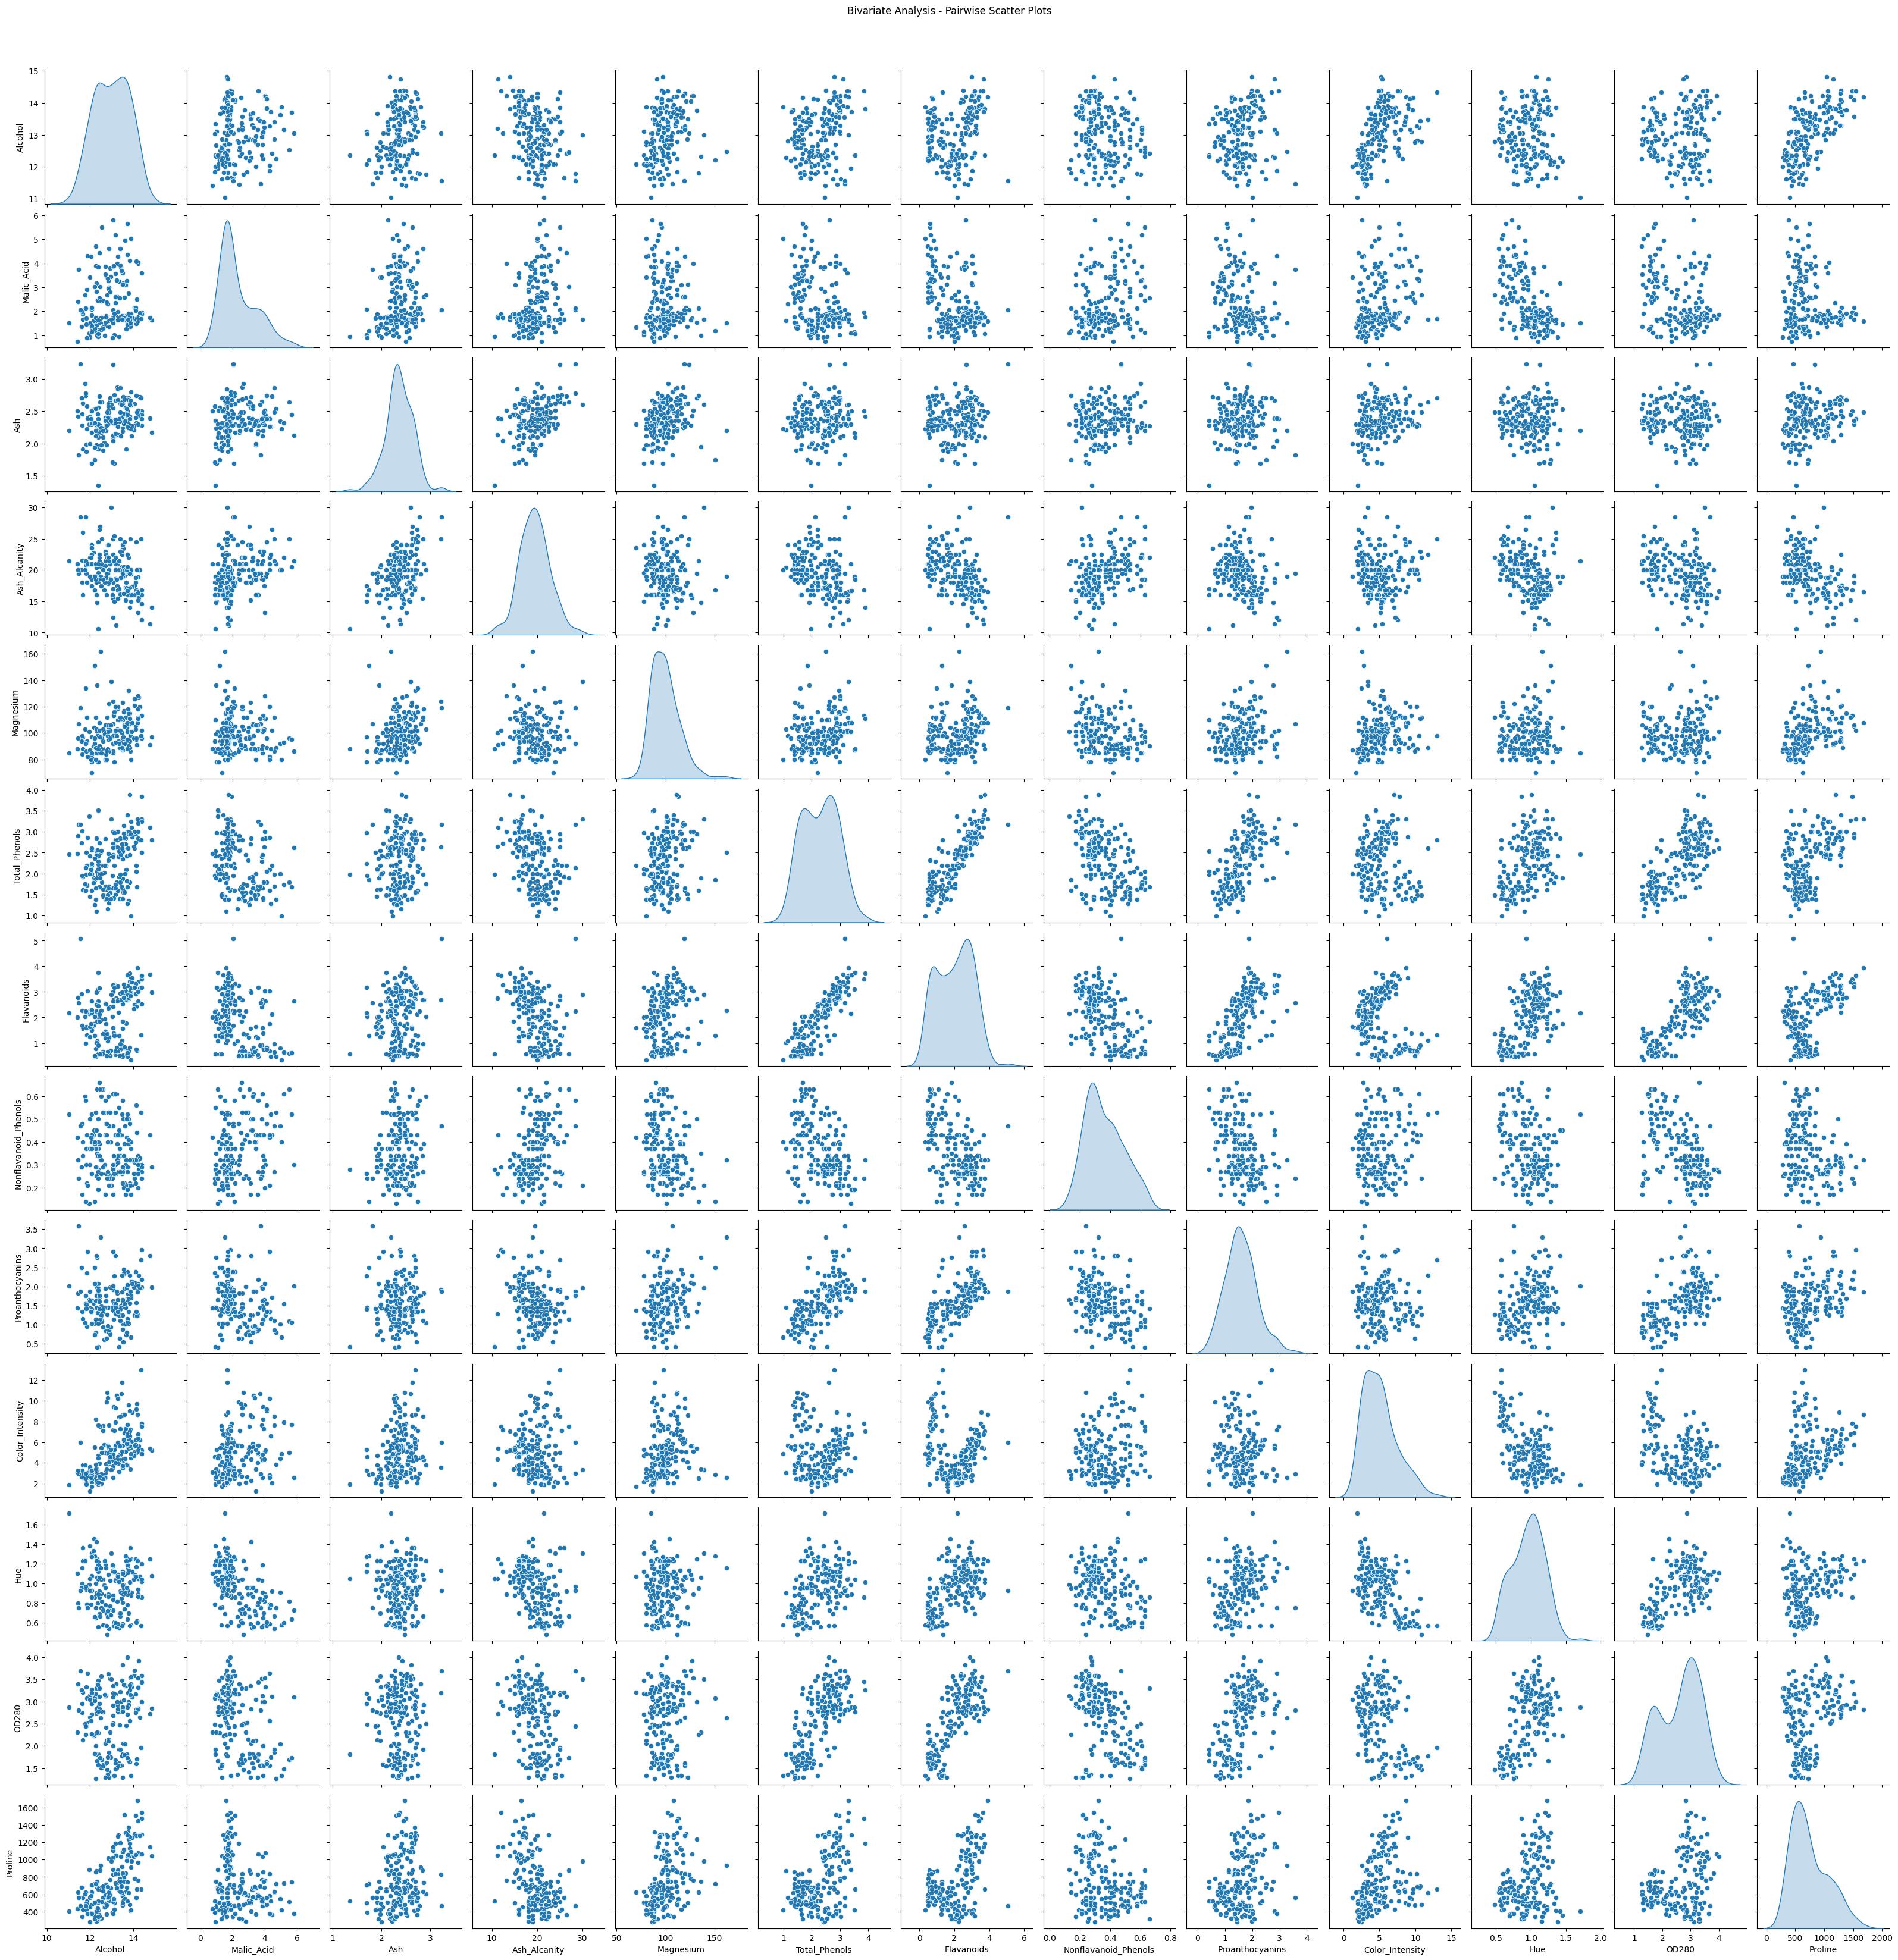

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot for bivariate analysis
plt.figure(figsize=(15, 15))
sns.pairplot(df, diag_kind='kde')
plt.suptitle('Bivariate Analysis - Pairwise Scatter Plots', y=1.02)
plt.show()


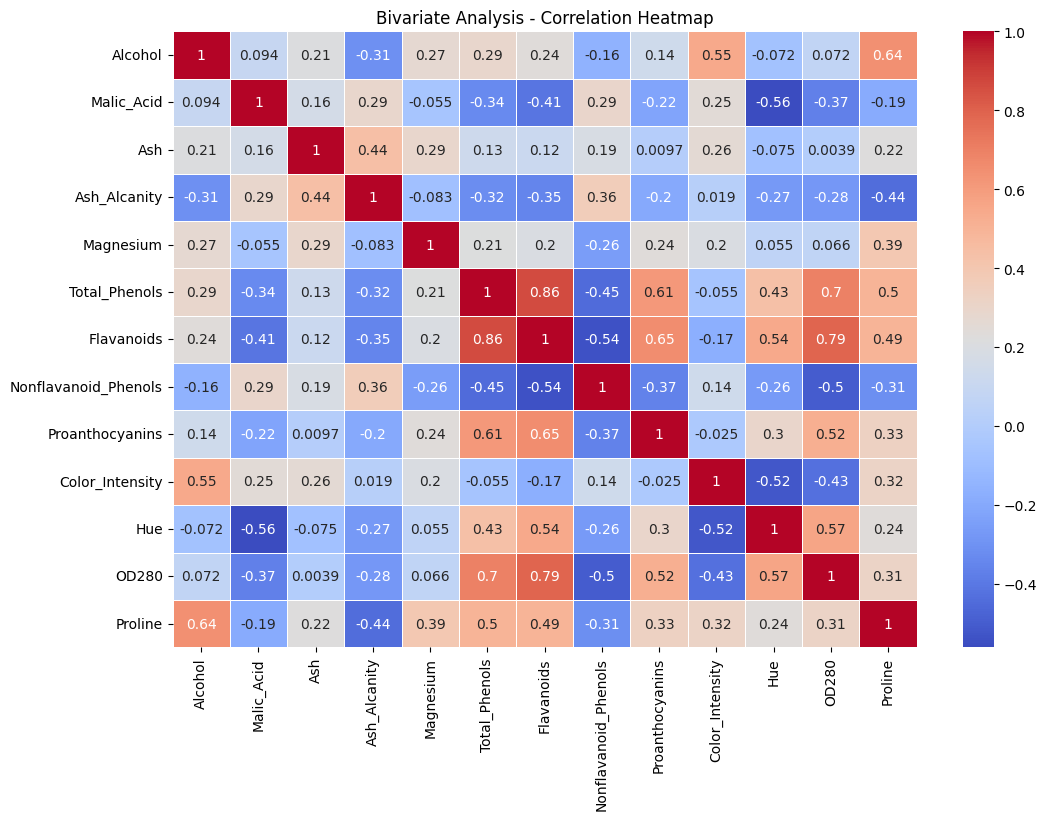

In [60]:
# Correlation matrix
correlation_matrix = df.corr()

# Heatmap for the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Bivariate Analysis - Correlation Heatmap')
plt.show()


# PCA

In [35]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Apply PCA to keep all components
pca = PCA()
pca_components = pca.fit_transform(df_scaled)

# Dynamically generate column names for all principal components
num_components = pca_components.shape[1]
pca_df = pd.DataFrame(pca_components, columns=[f'PC{i+1}' for i in range(num_components)])

# Print the explained variance ratio for each component
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Print the transformed DataFrame with principal components
print(pca_df.head())


Explained variance ratio: [0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679 0.02680749 0.02222153 0.01930019 0.01736836 0.01298233
 0.00795215]
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  3.316751  1.443463 -0.165739 -0.215631  0.693043  0.223880  0.596427   
1  2.209465 -0.333393 -2.026457 -0.291358 -0.257655  0.927120  0.053776   
2  2.516740  1.031151  0.982819  0.724902 -0.251033 -0.549276  0.424205   
3  3.757066  2.756372 -0.176192  0.567983 -0.311842 -0.114431 -0.383337   
4  1.008908  0.869831  2.026688 -0.409766  0.298458  0.406520  0.444074   

        PC8       PC9      PC10      PC11      PC12      PC13  
0 -0.065139 -0.641443  1.020956 -0.451563  0.540810 -0.066239  
1 -1.024416  0.308847  0.159701 -0.142657  0.388238  0.003637  
2  0.344216  1.177834  0.113361 -0.286673  0.000584  0.021717  
3 -0.643593 -0.052544  0.239413  0.759584 -0.242020 -0.369484  
4 -0.416700 -0.326819 -0.078366 -0.525945 -0.216664 -0.0

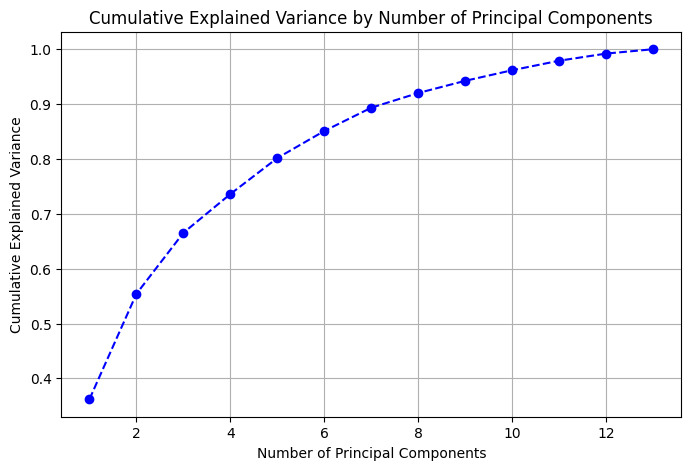

In [36]:
# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Number of Principal Components')
plt.grid()
plt.show()

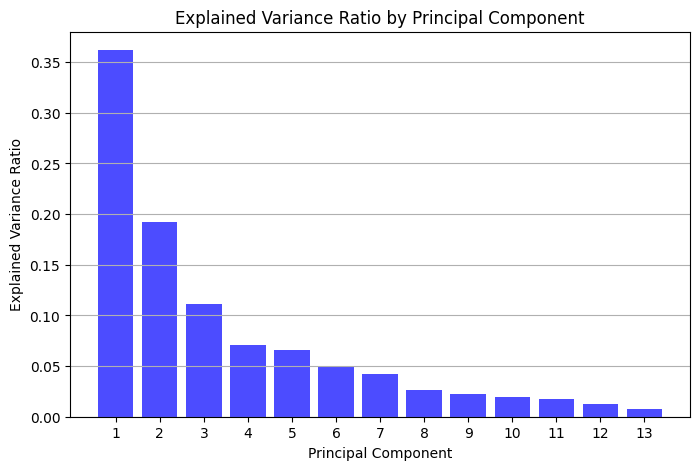

In [37]:
import matplotlib.pyplot as plt

# Plot the explained variance ratio for each component
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, alpha=0.7, color='b')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.xticks(range(1, len(pca.explained_variance_ratio_) + 1))  # Ensures each component is labeled on the x-axis
plt.grid(axis='y')
plt.show()


We will keep 5 components.

In [40]:
pca_5 = PCA(n_components=5)
pca_5.fit(df_scaled)
PCA_df = pd.DataFrame(pca_5.transform(df_scaled), columns=['c1', 'c2', 'c3', 'c4', 'c5'])
PCA_df.head().T


,0,1,2,3,4
c1,3.316751,2.209465,2.516740,3.757066,1.008908
c2,1.443463,-0.333393,1.031151,2.756372,0.869831
c3,-0.165739,-2.026457,0.982819,-0.176192,2.026688
c4,-0.215631,-0.291358,0.724902,0.567983,-0.409766
c5,0.693043,-0.257655,-0.251033,-0.311842,0.298458


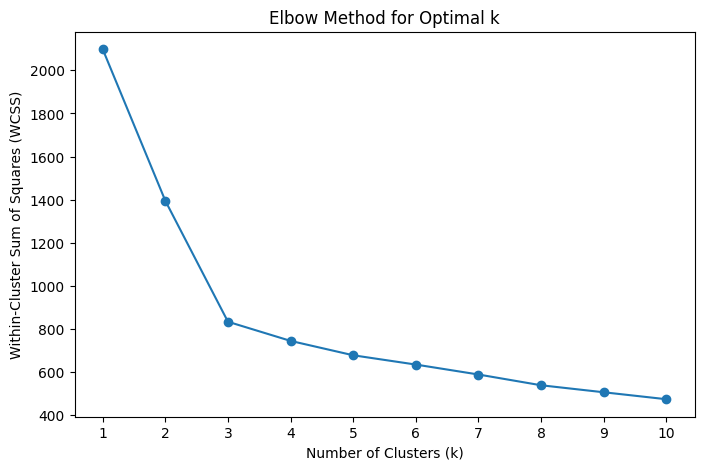

In [61]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Define the range of clusters to test for the Elbow Method
wcss = []
cluster_range = range(1, 11)  # Testing for 1 to 10 clusters

# Calculate WCSS for each number of clusters
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(PCA_df)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS for KMeans

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, wcss, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.xticks(cluster_range)
plt.show()


# K-means Clustering

In [45]:
from sklearn.cluster import KMeans

# Set the number of clusters (you can adjust this as needed)
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the KMeans model and predict cluster labels
PCA_df['Cluster'] = kmeans.fit_predict(PCA_df)

# Display the DataFrame with the cluster labels
print(PCA_df.head())


         c1        c2        c3        c4        c5  Cluster
0  3.316751  1.443463 -0.165739 -0.215631  0.693043        2
1  2.209465 -0.333393 -2.026457 -0.291358 -0.257655        2
2  2.516740  1.031151  0.982819  0.724902 -0.251033        2
3  3.757066  2.756372 -0.176192  0.567983 -0.311842        2
4  1.008908  0.869831  2.026688 -0.409766  0.298458        2


In [46]:
# Assign cluster labels to the original dataset
df['Cluster'] = PCA_df['Cluster']

# Display the first few rows of PCA_df and the original df with cluster labels
print("PCA_df with clusters:")
print(PCA_df.head())

print("\nOriginal df with clusters:")
print(df.head())


PCA_df with clusters:
         c1        c2        c3        c4        c5  Cluster
0  3.316751  1.443463 -0.165739 -0.215631  0.693043        2
1  2.209465 -0.333393 -2.026457 -0.291358 -0.257655        2
2  2.516740  1.031151  0.982819  0.724902 -0.251033        2
3  3.757066  2.756372 -0.176192  0.567983 -0.311842        2
4  1.008908  0.869831  2.026688 -0.409766  0.298458        2

Original df with clusters:
   Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1

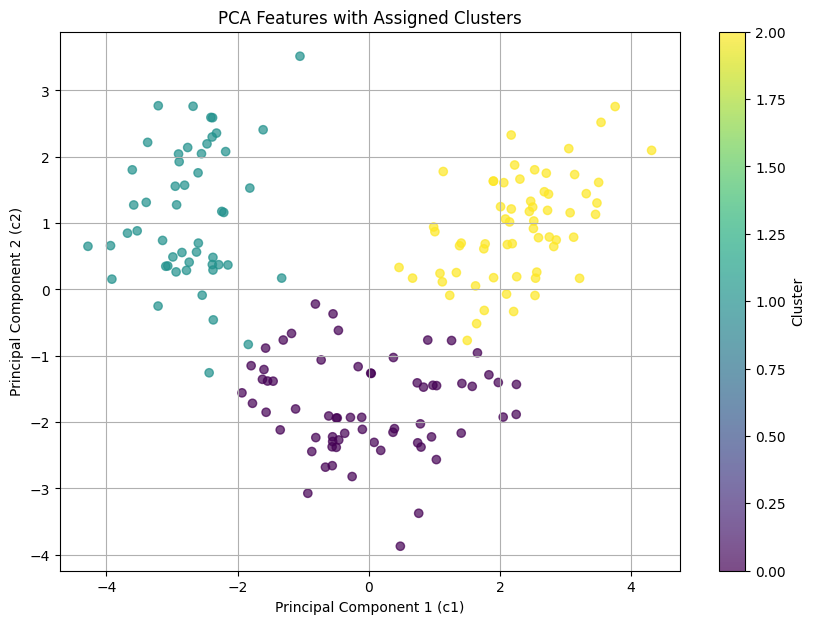

In [48]:

# Plotting PCA features with assigned clusters
plt.figure(figsize=(10, 7))
plt.scatter(PCA_df['c1'], PCA_df['c2'], c=PCA_df['Cluster'], cmap='viridis', alpha=0.7)

# Add titles and labels
plt.title('PCA Features with Assigned Clusters')
plt.xlabel('Principal Component 1 (c1)')
plt.ylabel('Principal Component 2 (c2)')

# Create a legend
plt.colorbar(label='Cluster')

# Show the plot
plt.grid()
plt.show()


# Agglomerative Clustering

In [49]:
from sklearn.cluster import AgglomerativeClustering

# Set the number of clusters (you can adjust this as needed)
n_clusters = 3  # Adjust based on your analysis
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)

# Fit the model and predict cluster labels
PCA_df['Agglomerative_Cluster'] = agg_clustering.fit_predict(PCA_df)

# Assign cluster labels to the original dataset
df['Agglomerative_Cluster'] = PCA_df['Agglomerative_Cluster']

# Display the first few rows of PCA_df and df with cluster labels
print("PCA_df with Agglomerative clusters:")
print(PCA_df.head())

print("\nOriginal df with Agglomerative clusters:")
print(df.head())


PCA_df with Agglomerative clusters:
         c1        c2        c3        c4        c5  Cluster  \
0  3.316751  1.443463 -0.165739 -0.215631  0.693043        2   
1  2.209465 -0.333393 -2.026457 -0.291358 -0.257655        2   
2  2.516740  1.031151  0.982819  0.724902 -0.251033        2   
3  3.757066  2.756372 -0.176192  0.567983 -0.311842        2   
4  1.008908  0.869831  2.026688 -0.409766  0.298458        2   

   Agglomerative_Cluster  
0                      1  
1                      1  
2                      1  
3                      1  
4                      1  

Original df with Agglomerative clusters:
   Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24     

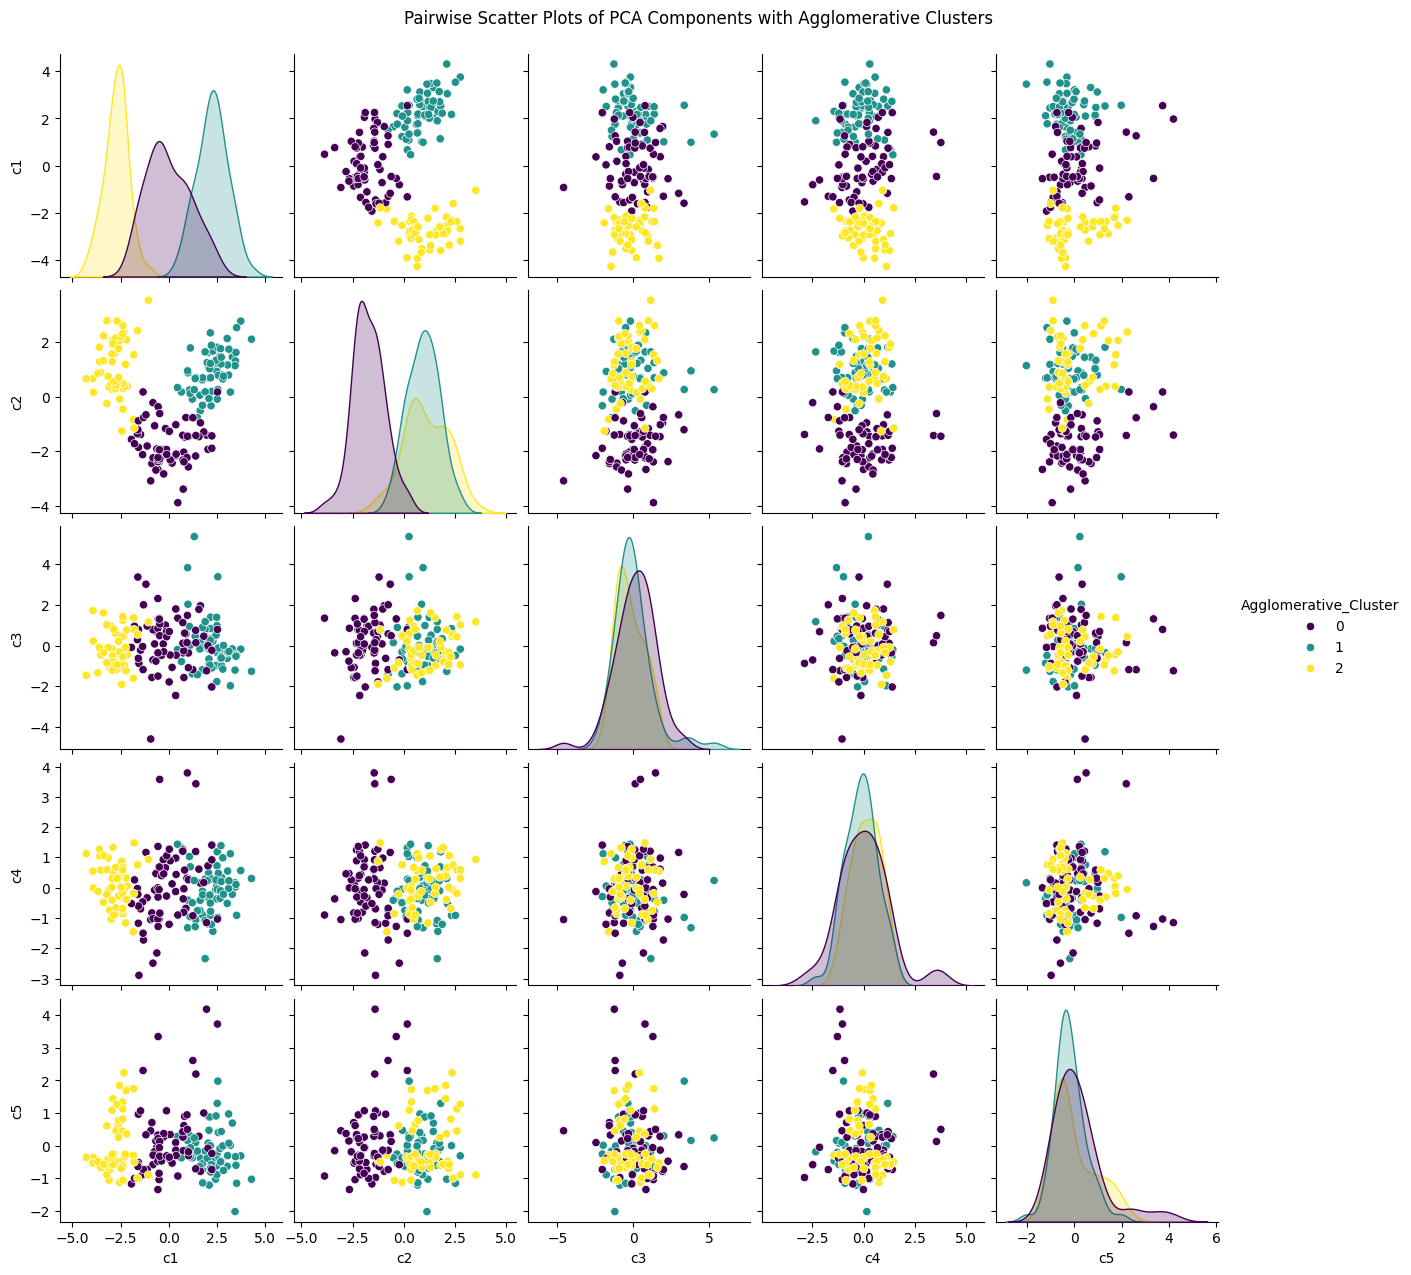

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create pairwise scatter plots for the first 5 components
pca_columns = ['c1', 'c2', 'c3', 'c4', 'c5']

# Set up the pairplot
sns.pairplot(PCA_df, vars=pca_columns, hue='Agglomerative_Cluster', palette='viridis')

# Show the plot
plt.suptitle('Pairwise Scatter Plots of PCA Components with Agglomerative Clusters', y=1.02)
plt.show()

